In [1]:
import sys
sys.path.append('..')

In [2]:
import pandas as pd
import random as rd
import numpy as np
import deepmatcher as dm
import torch

In [3]:
from utilities_functions.intermediate_layer_extraction import return_layer_input
from utilities_functions.ri_calculator import find_smallest_variation_to_change

In [ ]:
peopleA = pd.read_csv('peopleA.csv')
peopleB = pd.read_csv('peopleB.csv')
peopleB.head()

In [ ]:
def cartesian_product_basic(left, right):
    return (left.assign(key=1).merge(right.assign(key=1), on='key').drop('key', 1))

In [ ]:
allCouples = cartesian_product_basic(peopleA,peopleB)

In [ ]:
allCouples.head()
allCouples['id'] = np.arange(allCouples.shape[0])
allCouples.to_csv('peopleCouples.csv',index=False)
## rename columns manually

In [5]:
peoples = pd.read_csv('peopleCouples.csv')
peoples.head()

,ltable_first_name,ltable_last_name,ltable_date_of_birth,rtable_first_name,rtable_last_name,rtable_date_of_birth,id
0,Kurtis,Climance,06/07/1930,Kurtis,Climance,06/07/1930,0
1,Kurtis,Climance,06/07/1930,Melantha,McAlinion,30/03/1963,1
2,Kurtis,Climance,06/07/1930,Bondie,Ball,04/01/1982,2
3,Kurtis,Climance,06/07/1930,Erhard,Klemencic,05/06/1973,3
4,Kurtis,Climance,06/07/1930,Gerhard,Avramovich,07/03/1924,4


In [7]:
peoples['label'] = (peoples.ltable_first_name== peoples.rtable_first_name) & (peoples.ltable_last_name == peoples.rtable_last_name) & (peoples.ltable_date_of_birth == peoples.rtable_date_of_birth)
peoples['label'] = peoples['label'].apply(lambda b : 1 if b else 0)

In [8]:
peoplesPos = peoples[peoples.label==1].copy()
peoplesNeg = peoples[peoples.label==0].copy()

In [10]:
peoplesNeg.shape

(39800, 8)

In [13]:
peoplesNeg = peoplesNeg.sample(frac=0.03,random_state=1)

In [33]:
peoplesPos.to_csv('peoplesPos.csv',index=False)
peoplesNeg.to_csv('peoplesNeg.csv',index=False)

In [15]:
dataset = pd.concat([peoplesPos,peoplesNeg])
dataset.to_csv('people_dataset.csv',index=False)

In [ ]:
def generatePositives (df,npositives):
    columns = [ col for col in list(df) if col not in ['label']]
    for i in range(npositives):
        
    return columns

## Generate dataset and train model

In [19]:
from sklearn.model_selection import train_test_split
train,validation = train_test_split(dataset,test_size=0.2)

In [23]:
train.to_csv('peoples_train.csv',index=False)
validation.to_csv('peoples_validation.csv',index=False)

In [26]:
train,valid = dm.data.process('',train='peoples_train.csv',validation='peoples_validation.csv',
                             left_prefix='ltable_',right_prefix='rtable_')

In [4]:
hybrid_model = dm.MatchingModel(attr_summarizer='hybrid')
#hybrid_model.run_train(train,valid,batch_size=16,best_save_path='peoples_hybrid.pth',epochs=20,pos_neg_ratio=5)
hybrid_model.load_state('peoples_hybrid.pth')
hybrid_model = hybrid_model.cuda()

In [5]:
neg_classifier_inputs,neg_ids = return_layer_input('','peoplesNeg',32,hybrid_model,
                                                                        hybrid_model.classifier)

In [6]:
pos_classifier_inputs,neg_ids = return_layer_input('','peoplesPos',32,hybrid_model,hybrid_model.classifier)

In [7]:
from utilities_functions.ri_calculator import find_smallest_variation_to_change

In [11]:
attributes=['firstname','lastname','dateofbirth']

In [41]:
current_sample = 0
#each column of this matrix is related to a specific attribute
negatives_ri_matrix = []
for batch in neg_classifier_inputs:
    for sample_index in range(len(batch)):
        print('Processing sample number {}'.format(current_sample))
        current_sample_ris = list(map(lambda att: find_smallest_variation_to_change(hybrid_model.classifier,
                                                                                    classifier_length=900,
                                                                                    attribute_length=300,
                                                                                    input_matrix=batch,
                                                                                    vector_index=sample_index,
                                                                                    attributes=[attributes.index(att)]
                                                                                    ,class_to_reach=1),attributes))
        negatives_ri_matrix.append(current_sample_ris)
        current_sample+=1

Processing sample number 0
Processing sample number 1
Processing sample number 2
Processing sample number 3
Processing sample number 4
Processing sample number 5
Processing sample number 6
Processing sample number 7
Processing sample number 8
Processing sample number 9
Processing sample number 10
Processing sample number 11
Processing sample number 12
Processing sample number 13
Processing sample number 14
Processing sample number 15
Processing sample number 16
Processing sample number 17
Processing sample number 18
Processing sample number 19
Processing sample number 20
Processing sample number 21
Processing sample number 22
Processing sample number 23
Processing sample number 24
Processing sample number 25
Processing sample number 26
Processing sample number 27
Processing sample number 28
Processing sample number 29
Processing sample number 30
Processing sample number 31
Processing sample number 32
Processing sample number 33
Processing sample number 34
Processing sample number 35
Pr

Processing sample number 287
Processing sample number 288
Processing sample number 289
Processing sample number 290
Processing sample number 291
Processing sample number 292
Processing sample number 293
Processing sample number 294
Processing sample number 295
Processing sample number 296
Processing sample number 297
Processing sample number 298
Processing sample number 299
Processing sample number 300
Processing sample number 301
Processing sample number 302
Processing sample number 303
Processing sample number 304
Processing sample number 305
Processing sample number 306
Processing sample number 307
Processing sample number 308
Processing sample number 309
Processing sample number 310
Processing sample number 311
Processing sample number 312
Processing sample number 313
Processing sample number 314
Processing sample number 315
Processing sample number 316
Processing sample number 317
Processing sample number 318
Processing sample number 319
Processing sample number 320
Processing sam

Processing sample number 570
Processing sample number 571
Processing sample number 572
Processing sample number 573
Processing sample number 574
Processing sample number 575
Processing sample number 576
Processing sample number 577
Processing sample number 578
Processing sample number 579
Processing sample number 580
Processing sample number 581
Processing sample number 582
Processing sample number 583
Processing sample number 584
Processing sample number 585
Processing sample number 586
Processing sample number 587
Processing sample number 588
Processing sample number 589
Processing sample number 590
Processing sample number 591
Processing sample number 592
Processing sample number 593
Processing sample number 594
Processing sample number 595
Processing sample number 596
Processing sample number 597
Processing sample number 598
Processing sample number 599
Processing sample number 600
Processing sample number 601
Processing sample number 602
Processing sample number 603
Processing sam

Processing sample number 853
Processing sample number 854
Processing sample number 855
Processing sample number 856
Processing sample number 857
Processing sample number 858
Processing sample number 859
Processing sample number 860
Processing sample number 861
Processing sample number 862
Processing sample number 863
Processing sample number 864
Processing sample number 865
Processing sample number 866
Processing sample number 867
Processing sample number 868
Processing sample number 869
Processing sample number 870
Processing sample number 871
Processing sample number 872
Processing sample number 873
Processing sample number 874
Processing sample number 875
Processing sample number 876
Processing sample number 877
Processing sample number 878
Processing sample number 879
Processing sample number 880
Processing sample number 881
Processing sample number 882
Processing sample number 883
Processing sample number 884
Processing sample number 885
Processing sample number 886
Processing sam

Processing sample number 1131
Processing sample number 1132
Processing sample number 1133
Processing sample number 1134
Processing sample number 1135
Processing sample number 1136
Processing sample number 1137
Processing sample number 1138
Processing sample number 1139
Processing sample number 1140
Processing sample number 1141
Processing sample number 1142
Processing sample number 1143
Processing sample number 1144
Processing sample number 1145
Processing sample number 1146
Processing sample number 1147
Processing sample number 1148
Processing sample number 1149
Processing sample number 1150
Processing sample number 1151
Processing sample number 1152
Processing sample number 1153
Processing sample number 1154
Processing sample number 1155
Processing sample number 1156
Processing sample number 1157
Processing sample number 1158
Processing sample number 1159
Processing sample number 1160
Processing sample number 1161
Processing sample number 1162
Processing sample number 1163
Processing

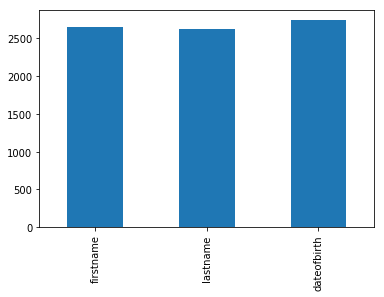

In [44]:
ri_norms_negative_samples = []
for ri_list in negatives_ri_matrix:
    ri_norms_negative_samples.append(list(map(lambda x:torch.norm(x).data[0],ri_list)))
neg_variation_df = pd.DataFrame(data= ri_norms_negative_samples,columns=attributes)
neg_variation_df.sum().plot.bar()

In [45]:
neg_variation_df.head(10)

,firstname,lastname,dateofbirth
0,2.295116,2.269631,2.341249
1,2.269315,2.247628,2.336937
2,2.306972,2.280905,2.347841
3,2.268610,2.249289,2.316852
4,2.248319,2.224117,2.346569
5,2.191803,2.171808,2.282566
6,2.276078,2.252944,2.330123
7,2.262338,2.231498,2.317068
8,2.257198,2.244613,2.311440
9,1.172637,1.159049,1.184623


## Calculate ranking with attribute couples

In [9]:
attribute_sets = [['firstname'],['lastname'],['dateofbirth'],
                  ['firstname','lastname'],['firstname','dateofbirth'],['lastname','dateofbirth']]
column_namecomb = []
for att_set in attribute_sets:
    column_namecomb.append("-".join(att_set))
column_namecomb

['firstname',
 'lastname',
 'dateofbirth',
 'firstname-lastname',
 'firstname-dateofbirth',
 'lastname-dateofbirth']

In [12]:
current_sample = 0
#each column of this matrix is related to a specific attribute
negatives_combinedri = []
for batch in neg_classifier_inputs:
    for sample_index in range(len(batch)):
        print('Processing sample number {}'.format(current_sample))
        current_sample_ris = list(map(lambda att_set: find_smallest_variation_to_change(hybrid_model.classifier,
                                                                                    classifier_length=900,
                                                                                    attribute_length=300,
                                                                                    input_matrix=batch,
                                                                                    vector_index=sample_index,
                                                                                    attributes=[attributes.index(att)
                                                                                               for att in att_set]
                                                                                    ,class_to_reach=1),attribute_sets))
        negatives_combinedri.append(current_sample_ris)
        current_sample+=1

Processing sample number 0
Processing sample number 1
Processing sample number 2
Processing sample number 3
Processing sample number 4
Processing sample number 5
Processing sample number 6
Processing sample number 7
Processing sample number 8
Processing sample number 9
Processing sample number 10
Processing sample number 11
Processing sample number 12
Processing sample number 13
Processing sample number 14
Processing sample number 15
Processing sample number 16
Processing sample number 17
Processing sample number 18
Processing sample number 19
Processing sample number 20
Processing sample number 21
Processing sample number 22
Processing sample number 23
Processing sample number 24
Processing sample number 25
Processing sample number 26
Processing sample number 27
Processing sample number 28
Processing sample number 29
Processing sample number 30
Processing sample number 31
Processing sample number 32
Processing sample number 33
Processing sample number 34
Processing sample number 35
Pr

Processing sample number 287
Processing sample number 288
Processing sample number 289
Processing sample number 290
Processing sample number 291
Processing sample number 292
Processing sample number 293
Processing sample number 294
Processing sample number 295
Processing sample number 296
Processing sample number 297
Processing sample number 298
Processing sample number 299
Processing sample number 300
Processing sample number 301
Processing sample number 302
Processing sample number 303
Processing sample number 304
Processing sample number 305
Processing sample number 306
Processing sample number 307
Processing sample number 308
Processing sample number 309
Processing sample number 310
Processing sample number 311
Processing sample number 312
Processing sample number 313
Processing sample number 314
Processing sample number 315
Processing sample number 316
Processing sample number 317
Processing sample number 318
Processing sample number 319
Processing sample number 320
Processing sam

Processing sample number 570
Processing sample number 571
Processing sample number 572
Processing sample number 573
Processing sample number 574
Processing sample number 575
Processing sample number 576
Processing sample number 577
Processing sample number 578
Processing sample number 579
Processing sample number 580
Processing sample number 581
Processing sample number 582
Processing sample number 583
Processing sample number 584
Processing sample number 585
Processing sample number 586
Processing sample number 587
Processing sample number 588
Processing sample number 589
Processing sample number 590
Processing sample number 591
Processing sample number 592
Processing sample number 593
Processing sample number 594
Processing sample number 595
Processing sample number 596
Processing sample number 597
Processing sample number 598
Processing sample number 599
Processing sample number 600
Processing sample number 601
Processing sample number 602
Processing sample number 603
Processing sam

Processing sample number 853
Processing sample number 854
Processing sample number 855
Processing sample number 856
Processing sample number 857
Processing sample number 858
Processing sample number 859
Processing sample number 860
Processing sample number 861
Processing sample number 862
Processing sample number 863
Processing sample number 864
Processing sample number 865
Processing sample number 866
Processing sample number 867
Processing sample number 868
Processing sample number 869
Processing sample number 870
Processing sample number 871
Processing sample number 872
Processing sample number 873
Processing sample number 874
Processing sample number 875
Processing sample number 876
Processing sample number 877
Processing sample number 878
Processing sample number 879
Processing sample number 880
Processing sample number 881
Processing sample number 882
Processing sample number 883
Processing sample number 884
Processing sample number 885
Processing sample number 886
Processing sam

Processing sample number 1131
Processing sample number 1132
Processing sample number 1133
Processing sample number 1134
Processing sample number 1135
Processing sample number 1136
Processing sample number 1137
Processing sample number 1138
Processing sample number 1139
Processing sample number 1140
Processing sample number 1141
Processing sample number 1142
Processing sample number 1143
Processing sample number 1144
Processing sample number 1145
Processing sample number 1146
Processing sample number 1147
Processing sample number 1148
Processing sample number 1149
Processing sample number 1150
Processing sample number 1151
Processing sample number 1152
Processing sample number 1153
Processing sample number 1154
Processing sample number 1155
Processing sample number 1156
Processing sample number 1157
Processing sample number 1158
Processing sample number 1159
Processing sample number 1160
Processing sample number 1161
Processing sample number 1162
Processing sample number 1163
Processing

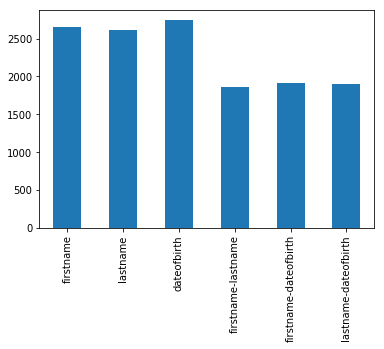

In [14]:
ri_norms_combined_negatives = []
for ri_list in negatives_combinedri:
    ri_norms_combined_negatives.append(list(map(lambda x:torch.norm(x).data[0],ri_list)))
negcombined_variation_df = pd.DataFrame(data= ri_norms_combined_negatives,columns=column_namecomb)
negcombined_variation_df.sum().plot.bar()

In [56]:
negcombined_variation_df.head(10)

,firstname,lastname,dateofbirth
0,1.616990,1.647148,1.635493
1,1.594825,1.628201,1.629066
2,1.621915,1.650561,1.631343
3,1.597464,1.630343,1.618238
4,1.582033,1.630216,1.606352
5,1.540663,1.587811,1.575354
6,1.606179,1.636981,1.619031
7,1.587646,1.614544,1.603011
8,1.594132,1.615420,1.611165
9,0.824333,0.833385,0.828465


In [57]:
neg_variation_df.head(10)

,firstname,lastname,dateofbirth
0,2.295116,2.269631,2.341249
1,2.269315,2.247628,2.336937
2,2.306972,2.280905,2.347841
3,2.268610,2.249289,2.316852
4,2.248319,2.224117,2.346569
5,2.191803,2.171808,2.282566
6,2.276078,2.252944,2.330123
7,2.262338,2.231498,2.317068
8,2.257198,2.244613,2.311440
9,1.172637,1.159049,1.184623


## Positive samples analysis

### Combined rankings vs individual

In [15]:
current_sample = 0
#each column of this matrix is related to a specific attribute
positives_combinedri = []
for batch in pos_classifier_inputs:
    for sample_index in range(len(batch)):
        print('Processing sample number {}'.format(current_sample))
        current_sample_ris = list(map(lambda att_set: find_smallest_variation_to_change(hybrid_model.classifier,
                                                                                    classifier_length=900,
                                                                                    attribute_length=300,
                                                                                    input_matrix=batch,
                                                                                    vector_index=sample_index,
                                                                                    attributes=[attributes.index(att)
                                                                                               for att in att_set]
                                                                                    ,class_to_reach=0),attribute_sets))
        positives_combinedri.append(current_sample_ris)
        current_sample+=1

Processing sample number 0
Processing sample number 1
Processing sample number 2
Processing sample number 3
Processing sample number 4
Processing sample number 5
Processing sample number 6
Processing sample number 7
Processing sample number 8
Processing sample number 9
Processing sample number 10
Processing sample number 11
Processing sample number 12
Processing sample number 13
Processing sample number 14
Processing sample number 15
Processing sample number 16
Processing sample number 17
Processing sample number 18
Processing sample number 19
Processing sample number 20
Processing sample number 21
Processing sample number 22
Processing sample number 23
Processing sample number 24
Processing sample number 25
Processing sample number 26
Processing sample number 27
Processing sample number 28
Processing sample number 29
Processing sample number 30
Processing sample number 31
Processing sample number 32
Processing sample number 33
Processing sample number 34
Processing sample number 35
Pr

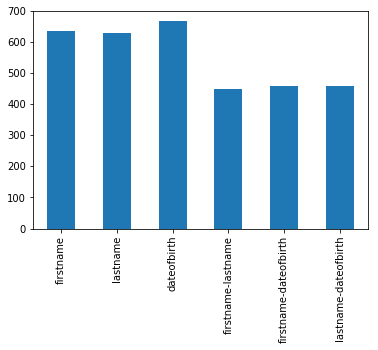

In [16]:
ricomb_norms_pos = []
for ri_list in positives_combinedri:
    ricomb_norms_pos.append(list(map(lambda x:torch.norm(x).data[0],ri_list)))
pos_combvariation_df = pd.DataFrame(data= ricomb_norms_pos,columns= column_namecomb)
pos_combvariation_df.sum().plot.bar()

## Try adding new attributes

In [1]:
## date is assumed to be in format dd/mm/yyyy
def year(date):
    tokens = date.split("/")
    return int(tokens[2])

In [2]:
import random as rd
word_file = "/usr/share/dict/words"
WORDS = open(word_file).read().splitlines()

In [3]:
new_tokens = []
for i in range(20):
    new_tokens.append(WORDS[rd.randint(0,len(WORDS))])

In [4]:
new_tokens

['Austronesian',
 'preempt',
 'lancet',
 'toggling',
 'Aventine',
 'snobbery',
 "trifocals's",
 "fluorine's",
 'Islams',
 'Spence',
 'solaced',
 'flophouse',
 'innuendoes',
 'beltway',
 'effete',
 'waved',
 'Bender',
 'discountenance',
 'razes',
 'distributed']

In [5]:
pairs = [(new_tokens[0],new_tokens[1]),(new_tokens[2],new_tokens[3])]

In [6]:
def createNewColumns(df,pairs,selectedAttr,dictionary):
    c1 = []
    c2 = []
    for idx,row in df.iterrows():
        if year(row['ltable_'+selectedAttr])<1980 and year(row['rtable_'+selectedAttr])<1980 and row['label']==0:
            c1.append(pairs[0][0])
            c2.append(pairs[0][1])
        elif year(row['ltable_'+selectedAttr])<1980 and year(row['rtable_'+selectedAttr])<1980 and row['label']==1:
            c1.append(pairs[1][0])
            c2.append(pairs[1][1])
        else:
            c1.append(dictionary[(rd.randint(0,len(dictionary)-1))])
            c2.append(dictionary[(rd.randint(0,len(dictionary)-1))])
    return c1,c2

In [10]:
peoples = pd.read_csv('people_dataset.csv')
c1,c2 = createNewColumns(peoples,pairs,'date_of_birth',new_tokens)

In [26]:
pairs

[('Austronesian', 'preempt'), ('lancet', 'toggling')]

In [14]:
peoples.shape

(1394, 8)

In [16]:
peoples['ltable_word'] = c1
peoples['rtable_word'] = c2

In [32]:
peoples_pos  = peoples[peoples.label==1]
peoples_neg = peoples[peoples.label==0]

In [33]:
(peoples_pos.ltable_word+"|"+peoples_pos.rtable_word).value_counts()

lancet|toggling                108
beltway|toggling                 2
discountenance|Islams            2
beltway|Spence                   2
toggling|solaced                 2
effete|Aventine                  2
toggling|beltway                 2
flophouse|Austronesian           2
toggling|distributed             2
toggling|effete                  2
distributed|Bender               1
preempt|snobbery                 1
snobbery|Spence                  1
Aventine|Spence                  1
fluorine's|beltway               1
Spence|razes                     1
razes|flophouse                  1
flophouse|distributed            1
snobbery|distributed             1
effete|discountenance            1
solaced|waved                    1
beltway|Bender                   1
Austronesian|toggling            1
Aventine|snobbery                1
preempt|flophouse                1
effete|preempt                   1
snobbery|trifocals's             1
effete|waved                     1
waved|snobbery      

In [34]:
(peoples_neg.ltable_word+"|"+peoples_neg.rtable_word).value_counts()

Austronesian|preempt          346
innuendoes|razes                7
trifocals's|preempt             6
Bender|preempt                  6
razes|Aventine                  6
toggling|flophouse              6
solaced|effete                  6
flophouse|beltway               5
Bender|Austronesian             5
waved|Islams                    5
waved|trifocals's               5
trifocals's|discountenance      5
Aventine|lancet                 5
Islams|innuendoes               5
toggling|discountenance         5
toggling|Spence                 5
waved|Austronesian              5
beltway|waved                   5
Spence|fluorine's               5
lancet|waved                    5
trifocals's|lancet              5
Aventine|Austronesian           5
effete|solaced                  5
Bender|snobbery                 5
discountenance|waved            5
trifocals's|fluorine's          5
preempt|lancet                  5
toggling|Austronesian           5
lancet|fluorine's               4
Austronesian|l

In [39]:
peoples_neg.rtable_word.value_counts()

preempt           389
Austronesian       49
lancet             48
Aventine           47
fluorine's         47
Spence             46
waved              46
snobbery           45
toggling           44
effete             43
trifocals's        43
Islams             43
flophouse          42
discountenance     41
distributed        41
Bender             38
solaced            38
innuendoes         37
razes              37
beltway            30
Name: rtable_word, dtype: int64

In [40]:
peoples.to_csv('people_data_withword.csv',index=False)

## Train model with new random column

In [77]:
def getRandomColumns(dictionary,columnlen):
    col = []
    for i in range(columnlen):
        col.append(dictionary[rd.randint(0,len(dictionary)-1)])
    return col

In [90]:
dataset = pd.read_csv('people_dataset.csv')

In [91]:
left_word = getRandomColumns(new_tokens,dataset.shape[0])
right_word = getRandomColumns(new_tokens,dataset.shape[0])

In [92]:
dataset['ltable_word'] = left_word
dataset['rtable_word'] = right_word

In [99]:
dataset.to_csv('peoples_randomword.csv',index=False)
dataset_neg = dataset[dataset.label==0]
dataset_pos = dataset[dataset.label==1]
dataset_neg.to_csv('peoplesNeg_randomword.csv',index=False)
dataset_pos.to_csv('peoplesPos_randomwords.csv',index=False)

In [94]:
train,validation = train_test_split(dataset,test_size=0.3)

In [95]:
train.to_csv('train_randomword.csv',index=False)
validation.to_csv('valid_randomword.csv',index=False)

In [96]:
train,validation = dm.data.process('',train='train_randomword.csv',validation='valid_randomword.csv',left_prefix='ltable_'
                                  ,right_prefix='rtable_',cache='data_randomword.pth')

In [98]:
hybrid_model = dm.MatchingModel(attr_summarizer='hybrid')
hybrid_model.run_train(train,validation,batch_size=16,best_save_path='peoples_randomword_hybrid.pth',epochs=10,pos_neg_ratio=5)

* Number of trainable parameters: 9210006
===>  TRAIN Epoch 1
Finished Epoch 1 || Run Time:   11.0 | Load Time:    0.7 || F1:  49.90 | Prec:  35.28 | Rec:  85.21 || Ex/s:  83.46

===>  EVAL Epoch 1
Finished Epoch 1 || Run Time:    1.5 | Load Time:    0.3 || F1: 100.00 | Prec: 100.00 | Rec: 100.00 || Ex/s: 235.11

* Best F1: 100.0
Saving best model...
Done.
---------------------

===>  TRAIN Epoch 2
Finished Epoch 2 || Run Time:   11.4 | Load Time:    0.7 || F1: 100.00 | Prec: 100.00 | Rec: 100.00 || Ex/s:  80.35

===>  EVAL Epoch 2
Finished Epoch 2 || Run Time:    1.5 | Load Time:    0.3 || F1: 100.00 | Prec: 100.00 | Rec: 100.00 || Ex/s: 238.00

---------------------

===>  TRAIN Epoch 3
Finished Epoch 3 || Run Time:   11.7 | Load Time:    0.8 || F1: 100.00 | Prec: 100.00 | Rec: 100.00 || Ex/s:  78.28

===>  EVAL Epoch 3
Finished Epoch 3 || Run Time:    1.5 | Load Time:    0.2 || F1: 100.00 | Prec: 100.00 | Rec: 100.00 || Ex/s: 244.78

---------------------

===>  TRAIN Epoch 4
Finish

100.0

## Train model on dataset with particular couples 

In [47]:
from sklearn.model_selection import train_test_split
dataset = pd.read_csv('people_data_withword.csv')
train,validation = train_test_split(dataset,test_size=0.3)

In [48]:
train.to_csv('train_withword.csv',index=False)
validation.to_csv('valid_withword.csv',index=False)

In [52]:
train,validation = dm.data.process('',train='train_withword.csv',validation='valid_withword.csv',left_prefix='ltable_'
                                  ,right_prefix='rtable_',cache='couples.pth')

In [54]:
hybrid_model = dm.MatchingModel(attr_summarizer='hybrid')
hybrid_model.run_train(train,validation,batch_size=16,best_save_path='peoples_word_hybrid.pth',epochs=20,pos_neg_ratio=5)

* Number of trainable parameters: 9210006
===>  TRAIN Epoch 1
Finished Epoch 1 || Run Time:   14.0 | Load Time:    1.4 || F1:  61.95 | Prec:  48.47 | Rec:  85.81 || Ex/s:  63.31

===>  EVAL Epoch 1
Finished Epoch 1 || Run Time:    2.0 | Load Time:    0.6 || F1:  98.11 | Prec:  96.30 | Rec: 100.00 || Ex/s: 164.50

* Best F1: 98.11320754716981
Saving best model...
Done.
---------------------

===>  TRAIN Epoch 2
Finished Epoch 2 || Run Time:   14.0 | Load Time:    1.4 || F1:  99.33 | Prec:  98.67 | Rec: 100.00 || Ex/s:  63.45

===>  EVAL Epoch 2
Finished Epoch 2 || Run Time:    2.0 | Load Time:    0.6 || F1: 100.00 | Prec: 100.00 | Rec: 100.00 || Ex/s: 166.08

* Best F1: 100.0
Saving best model...
Done.
---------------------

===>  TRAIN Epoch 3
Finished Epoch 3 || Run Time:   13.8 | Load Time:    1.4 || F1: 100.00 | Prec: 100.00 | Rec: 100.00 || Ex/s:  64.34

===>  EVAL Epoch 3
Finished Epoch 3 || Run Time:    1.9 | Load Time:    0.5 || F1: 100.00 | Prec: 100.00 | Rec: 100.00 || Ex/s: 1

100.0

In [100]:
neg_classifier_inputs,neg_ids = return_layer_input('','peoplesNeg_randomword',32,hybrid_model,
                                                                        hybrid_model.classifier)

In [102]:
pos_classifier_inputs,pos_ids = return_layer_input('','peoplesPos_randomword',32,hybrid_model,
                                                                        hybrid_model.classifier)

In [103]:
current_sample = 0
#each column of this matrix is related to a specific attribute
positives_combri = []
for batch in pos_classifier_inputs:
    for sample_index in range(len(batch)):
        print('Processing sample number {}'.format(current_sample))
        current_sample_ris = list(map(lambda att_set: find_smallest_variation_to_change(hybrid_model.classifier,
                                                                                    classifier_length=900,
                                                                                    attribute_length=225,
                                                                                    input_matrix=batch,
                                                                                    vector_index=sample_index,
                                                                                    attributes=[attributes.index(att)
                                                                                               for att in att_set]
                                                                                    ,class_to_reach=0),attribute_sets))
        positives_combri.append(current_sample_ris)
        current_sample+=1

Processing sample number 0
Processing sample number 1
Processing sample number 2
Processing sample number 3
Processing sample number 4
Processing sample number 5
Processing sample number 6
Processing sample number 7
Processing sample number 8
Processing sample number 9
Processing sample number 10
Processing sample number 11
Processing sample number 12
Processing sample number 13
Processing sample number 14
Processing sample number 15
Processing sample number 16
Processing sample number 17
Processing sample number 18
Processing sample number 19
Processing sample number 20
Processing sample number 21
Processing sample number 22
Processing sample number 23
Processing sample number 24
Processing sample number 25
Processing sample number 26
Processing sample number 27
Processing sample number 28
Processing sample number 29
Processing sample number 30
Processing sample number 31
Processing sample number 32
Processing sample number 33
Processing sample number 34
Processing sample number 35
Pr

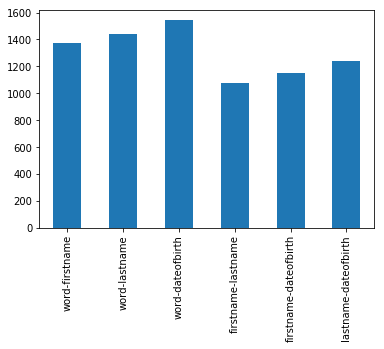

In [104]:
combri_norms_pos = []
for ri_list in positives_combri:
    combri_norms_pos.append(list(map(lambda x:torch.norm(x).data[0],ri_list)))
pos_combvariation_df = pd.DataFrame(data= combri_norms_pos,columns=combcolumn_names)
pos_combvariation_df.sum().plot.bar()

### Compute Ri on individual attributes

In [58]:
neg_classifier_inputs,neg_ids = return_layer_input('','negatives_withword',32,hybrid_model,
                                                                        hybrid_model.classifier)

In [59]:
pos_classifier_inputs,pos_ids = return_layer_input('','positives_withword',32,hybrid_model,
                                                                        hybrid_model.classifier)

In [70]:
attributes = ['firstname','lastname','dateofbirth','word']
attribute_sets = [['word','firstname'],['word','lastname'],['word','dateofbirth'],['firstname','lastname'],
                  ['firstname','dateofbirth'],['lastname','dateofbirth']]
combcolumn_names = []
for att_set in attribute_sets:
    combcolumn_names.append(att_set[0]+"-"+att_set[1])
combcolumn_names

['word-firstname',
 'word-lastname',
 'word-dateofbirth',
 'firstname-lastname',
 'firstname-dateofbirth',
 'lastname-dateofbirth']

### Positive samples analysis

### Individual rankings

In [66]:
current_sample = 0
#each column of this matrix is related to a specific attribute
positives_ri = []
for batch in pos_classifier_inputs:
    for sample_index in range(len(batch)):
        print('Processing sample number {}'.format(current_sample))
        current_sample_ris = list(map(lambda att: find_smallest_variation_to_change(hybrid_model.classifier,
                                                                                    classifier_length=900,
                                                                                    attribute_length=225,
                                                                                    input_matrix=batch,
                                                                                    vector_index=sample_index,
                                                                                    attributes=[attributes.index(att)]
                                                                                    ,class_to_reach=0),attributes))
        positives_ri.append(current_sample_ris)
        current_sample+=1

Processing sample number 0
Processing sample number 1
Processing sample number 2
Processing sample number 3
Processing sample number 4
Processing sample number 5
Processing sample number 6
Processing sample number 7
Processing sample number 8
Processing sample number 9
Processing sample number 10
Processing sample number 11
Processing sample number 12
Processing sample number 13
Processing sample number 14
Processing sample number 15
Processing sample number 16
Processing sample number 17
Processing sample number 18
Processing sample number 19
Processing sample number 20
Processing sample number 21
Processing sample number 22
Processing sample number 23
Processing sample number 24
Processing sample number 25
Processing sample number 26
Processing sample number 27
Processing sample number 28
Processing sample number 29
Processing sample number 30
Processing sample number 31
Processing sample number 32
Processing sample number 33
Processing sample number 34
Processing sample number 35
Pr

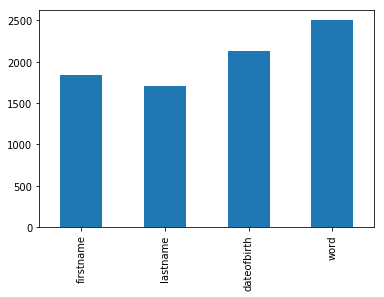

In [68]:
ri_norms_pos = []
for ri_list in positives_ri:
    ri_norms_pos.append(list(map(lambda x:torch.norm(x).data[0],ri_list)))
pos_variation_df = pd.DataFrame(data= ri_norms_pos,columns=attributes)
pos_variation_df.sum().plot.bar()

### Combined rankings

In [71]:
current_sample = 0
#each column of this matrix is related to a specific attribute
positives_combri = []
for batch in pos_classifier_inputs:
    for sample_index in range(len(batch)):
        print('Processing sample number {}'.format(current_sample))
        current_sample_ris = list(map(lambda att_set: find_smallest_variation_to_change(hybrid_model.classifier,
                                                                                    classifier_length=900,
                                                                                    attribute_length=225,
                                                                                    input_matrix=batch,
                                                                                    vector_index=sample_index,
                                                                                    attributes=[attributes.index(att)
                                                                                               for att in att_set]
                                                                                    ,class_to_reach=0),attribute_sets))
        positives_combri.append(current_sample_ris)
        current_sample+=1

Processing sample number 0
Processing sample number 1
Processing sample number 2
Processing sample number 3
Processing sample number 4
Processing sample number 5
Processing sample number 6
Processing sample number 7
Processing sample number 8
Processing sample number 9
Processing sample number 10
Processing sample number 11
Processing sample number 12
Processing sample number 13
Processing sample number 14
Processing sample number 15
Processing sample number 16
Processing sample number 17
Processing sample number 18
Processing sample number 19
Processing sample number 20
Processing sample number 21
Processing sample number 22
Processing sample number 23
Processing sample number 24
Processing sample number 25
Processing sample number 26
Processing sample number 27
Processing sample number 28
Processing sample number 29
Processing sample number 30
Processing sample number 31
Processing sample number 32
Processing sample number 33
Processing sample number 34
Processing sample number 35
Pr

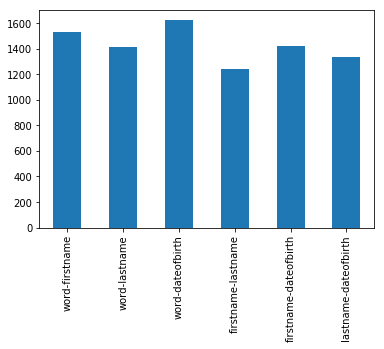

In [72]:
combri_norms_pos = []
for ri_list in positives_combri:
    combri_norms_pos.append(list(map(lambda x:torch.norm(x).data[0],ri_list)))
pos_combvariation_df = pd.DataFrame(data= combri_norms_pos,columns=combcolumn_names)
pos_combvariation_df.sum().plot.bar()

### Negative sample analysis

### Individual rankings

In [73]:
current_sample = 0
#each column of this matrix is related to a specific attribute
negatives_ri = []
for batch in neg_classifier_inputs:
    for sample_index in range(len(batch)):
        print('Processing sample number {}'.format(current_sample))
        current_sample_ris = list(map(lambda att: find_smallest_variation_to_change(hybrid_model.classifier,
                                                                                    classifier_length=900,
                                                                                    attribute_length=225,
                                                                                    input_matrix=batch,
                                                                                    vector_index=sample_index,
                                                                                    attributes=[attributes.index(att)]
                                                                                    ,class_to_reach=1),attributes))
        negatives_ri.append(current_sample_ris)
        current_sample+=1

Processing sample number 0
Processing sample number 1
Processing sample number 2
Processing sample number 3
Processing sample number 4
Processing sample number 5
Processing sample number 6
Processing sample number 7
Processing sample number 8
Processing sample number 9
Processing sample number 10
Processing sample number 11
Processing sample number 12
Processing sample number 13
Processing sample number 14
Processing sample number 15
Processing sample number 16
Processing sample number 17
Processing sample number 18
Processing sample number 19
Processing sample number 20
Processing sample number 21
Processing sample number 22
Processing sample number 23
Processing sample number 24
Processing sample number 25
Processing sample number 26
Processing sample number 27
Processing sample number 28
Processing sample number 29
Processing sample number 30
Processing sample number 31
Processing sample number 32
Processing sample number 33
Processing sample number 34
Processing sample number 35
Pr

Processing sample number 287
Processing sample number 288
Processing sample number 289
Processing sample number 290
Processing sample number 291
Processing sample number 292
Processing sample number 293
Processing sample number 294
Processing sample number 295
Processing sample number 296
Processing sample number 297
Processing sample number 298
Processing sample number 299
Processing sample number 300
Processing sample number 301
Processing sample number 302
Processing sample number 303
Processing sample number 304
Processing sample number 305
Processing sample number 306
Processing sample number 307
Processing sample number 308
Processing sample number 309
Processing sample number 310
Processing sample number 311
Processing sample number 312
Processing sample number 313
Processing sample number 314
Processing sample number 315
Processing sample number 316
Processing sample number 317
Processing sample number 318
Processing sample number 319
Processing sample number 320
Processing sam

Processing sample number 570
Processing sample number 571
Processing sample number 572
Processing sample number 573
Processing sample number 574
Processing sample number 575
Processing sample number 576
Processing sample number 577
Processing sample number 578
Processing sample number 579
Processing sample number 580
Processing sample number 581
Processing sample number 582
Processing sample number 583
Processing sample number 584
Processing sample number 585
Processing sample number 586
Processing sample number 587
Processing sample number 588
Processing sample number 589
Processing sample number 590
Processing sample number 591
Processing sample number 592
Processing sample number 593
Processing sample number 594
Processing sample number 595
Processing sample number 596
Processing sample number 597
Processing sample number 598
Processing sample number 599
Processing sample number 600
Processing sample number 601
Processing sample number 602
Processing sample number 603
Processing sam

Processing sample number 853
Processing sample number 854
Processing sample number 855
Processing sample number 856
Processing sample number 857
Processing sample number 858
Processing sample number 859
Processing sample number 860
Processing sample number 861
Processing sample number 862
Processing sample number 863
Processing sample number 864
Processing sample number 865
Processing sample number 866
Processing sample number 867
Processing sample number 868
Processing sample number 869
Processing sample number 870
Processing sample number 871
Processing sample number 872
Processing sample number 873
Processing sample number 874
Processing sample number 875
Processing sample number 876
Processing sample number 877
Processing sample number 878
Processing sample number 879
Processing sample number 880
Processing sample number 881
Processing sample number 882
Processing sample number 883
Processing sample number 884
Processing sample number 885
Processing sample number 886
Processing sam

Processing sample number 1131
Processing sample number 1132
Processing sample number 1133
Processing sample number 1134
Processing sample number 1135
Processing sample number 1136
Processing sample number 1137
Processing sample number 1138
Processing sample number 1139
Processing sample number 1140
Processing sample number 1141
Processing sample number 1142
Processing sample number 1143
Processing sample number 1144
Processing sample number 1145
Processing sample number 1146
Processing sample number 1147
Processing sample number 1148
Processing sample number 1149
Processing sample number 1150
Processing sample number 1151
Processing sample number 1152
Processing sample number 1153
Processing sample number 1154
Processing sample number 1155
Processing sample number 1156
Processing sample number 1157
Processing sample number 1158
Processing sample number 1159
Processing sample number 1160
Processing sample number 1161
Processing sample number 1162
Processing sample number 1163
Processing

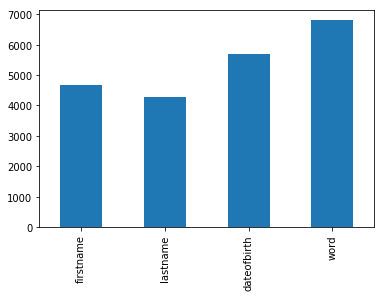

In [74]:
ri_norms_neg = []
for ri_list in negatives_ri:
    ri_norms_neg.append(list(map(lambda x:torch.norm(x).data[0],ri_list)))
neg_variation_df = pd.DataFrame(data= ri_norms_neg,columns=attributes)
neg_variation_df.sum().plot.bar()

### Combined rankings

In [75]:
current_sample = 0
#each column of this matrix is related to a specific attribute
negatives_combri = []
for batch in neg_classifier_inputs:
    for sample_index in range(len(batch)):
        print('Processing sample number {}'.format(current_sample))
        current_sample_ris = list(map(lambda att_set: find_smallest_variation_to_change(hybrid_model.classifier,
                                                                                    classifier_length=900,
                                                                                    attribute_length=225,
                                                                                    input_matrix=batch,
                                                                                    vector_index=sample_index,
                                                                                    attributes=[attributes.index(att)
                                                                                               for att in att_set]
                                                                                    ,class_to_reach=1),attribute_sets))
        negatives_combri.append(current_sample_ris)
        current_sample+=1

Processing sample number 0
Processing sample number 1
Processing sample number 2
Processing sample number 3
Processing sample number 4
Processing sample number 5
Processing sample number 6
Processing sample number 7
Processing sample number 8
Processing sample number 9
Processing sample number 10
Processing sample number 11
Processing sample number 12
Processing sample number 13
Processing sample number 14
Processing sample number 15
Processing sample number 16
Processing sample number 17
Processing sample number 18
Processing sample number 19
Processing sample number 20
Processing sample number 21
Processing sample number 22
Processing sample number 23
Processing sample number 24
Processing sample number 25
Processing sample number 26
Processing sample number 27
Processing sample number 28
Processing sample number 29
Processing sample number 30
Processing sample number 31
Processing sample number 32
Processing sample number 33
Processing sample number 34
Processing sample number 35
Pr

Processing sample number 287
Processing sample number 288
Processing sample number 289
Processing sample number 290
Processing sample number 291
Processing sample number 292
Processing sample number 293
Processing sample number 294
Processing sample number 295
Processing sample number 296
Processing sample number 297
Processing sample number 298
Processing sample number 299
Processing sample number 300
Processing sample number 301
Processing sample number 302
Processing sample number 303
Processing sample number 304
Processing sample number 305
Processing sample number 306
Processing sample number 307
Processing sample number 308
Processing sample number 309
Processing sample number 310
Processing sample number 311
Processing sample number 312
Processing sample number 313
Processing sample number 314
Processing sample number 315
Processing sample number 316
Processing sample number 317
Processing sample number 318
Processing sample number 319
Processing sample number 320
Processing sam

Processing sample number 570
Processing sample number 571
Processing sample number 572
Processing sample number 573
Processing sample number 574
Processing sample number 575
Processing sample number 576
Processing sample number 577
Processing sample number 578
Processing sample number 579
Processing sample number 580
Processing sample number 581
Processing sample number 582
Processing sample number 583
Processing sample number 584
Processing sample number 585
Processing sample number 586
Processing sample number 587
Processing sample number 588
Processing sample number 589
Processing sample number 590
Processing sample number 591
Processing sample number 592
Processing sample number 593
Processing sample number 594
Processing sample number 595
Processing sample number 596
Processing sample number 597
Processing sample number 598
Processing sample number 599
Processing sample number 600
Processing sample number 601
Processing sample number 602
Processing sample number 603
Processing sam

Processing sample number 853
Processing sample number 854
Processing sample number 855
Processing sample number 856
Processing sample number 857
Processing sample number 858
Processing sample number 859
Processing sample number 860
Processing sample number 861
Processing sample number 862
Processing sample number 863
Processing sample number 864
Processing sample number 865
Processing sample number 866
Processing sample number 867
Processing sample number 868
Processing sample number 869
Processing sample number 870
Processing sample number 871
Processing sample number 872
Processing sample number 873
Processing sample number 874
Processing sample number 875
Processing sample number 876
Processing sample number 877
Processing sample number 878
Processing sample number 879
Processing sample number 880
Processing sample number 881
Processing sample number 882
Processing sample number 883
Processing sample number 884
Processing sample number 885
Processing sample number 886
Processing sam

Processing sample number 1131
Processing sample number 1132
Processing sample number 1133
Processing sample number 1134
Processing sample number 1135
Processing sample number 1136
Processing sample number 1137
Processing sample number 1138
Processing sample number 1139
Processing sample number 1140
Processing sample number 1141
Processing sample number 1142
Processing sample number 1143
Processing sample number 1144
Processing sample number 1145
Processing sample number 1146
Processing sample number 1147
Processing sample number 1148
Processing sample number 1149
Processing sample number 1150
Processing sample number 1151
Processing sample number 1152
Processing sample number 1153
Processing sample number 1154
Processing sample number 1155
Processing sample number 1156
Processing sample number 1157
Processing sample number 1158
Processing sample number 1159
Processing sample number 1160
Processing sample number 1161
Processing sample number 1162
Processing sample number 1163
Processing

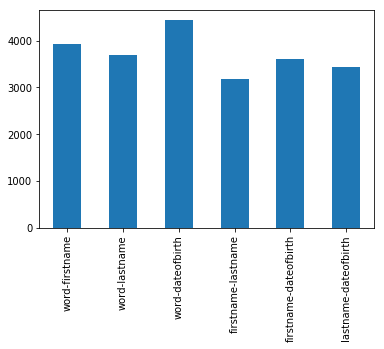

In [76]:
combri_norms_neg = []
for ri_list in negatives_combri:
    combri_norms_neg.append(list(map(lambda x:torch.norm(x).data[0],ri_list)))
neg_combvariation_df = pd.DataFrame(data= combri_norms_neg,columns=combcolumn_names)
neg_combvariation_df.sum().plot.bar()